## Import lib

In [1]:
# Import qucat objects
from qucat import GUI, Network, R,L,C,J
import qucat

In [2]:
import numpy as np
from copy import deepcopy
from scipy.constants import h,hbar,e
from time import time

# Plotting imports 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
%matplotlib inline

# Plotting settings
column = 3.54
two_columns = 7.48
matplotlib.rc
my_font = {'sans-serif': 'Myriad Pro'}
my_font.update({'size': 9})
matplotlib.rc('font', **my_font)

my_xticks = {'bottom':True}
my_xticks.update({'top':True})
my_xticks.update({'direction':'in'})
matplotlib.rc('xtick', **my_xticks)

my_yticks = {'left':True}
my_yticks.update({'right':True})
my_yticks.update({'direction':'in'})
matplotlib.rc('ytick', **my_yticks)

# Colors to be used 
c = cm.coolwarm(np.linspace(0.,1.,6))
dark_blue = c[0].tolist()
blue = c[1].tolist()
light_blue = c[2].tolist()
light_red = c[3].tolist()
red = c[4].tolist()
light_black = "#1c1c1c"
mode_0_color= dark_blue
mode_1_color = red

## Menginisialisasi sirkuit

In [3]:
# Programmable

circuit_components = [
# transmon
qucat.C(0,1,100e-15),
qucat.J(0,1,'Lj'),
# resonator
qucat.C(0,2,100e-15),
qucat.L(0,2,10e-9),
# coupling capacitor
qucat.C(1,2,1e-15),
# external coupling capacitor
qucat.C(2,3,0.5e-15),
# 50 Ohm load
qucat.R(3,0,50),
]
cQED = Network(circuit_components)

In [4]:
# Graphical

cQED = GUI('main.txt',edit = False, plot = False, print_network=True)

C 0 2 100 fF
J 0 2 Lj
C 0 1 1 fF
C 1 2 100 fF
L 1 2 10 nH
C 1 3 500 aF
R 2 3 50 Ohm




findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Myriad Pro


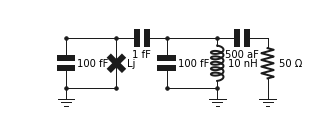

In [5]:
# Make circuti more compact for this figure
cQED.plotting_parameters_show['figsize_scaling'] = 0.7

# Generate the circuit figure
fig,ax = cQED.show(plot = False, return_fig_ax = True)

# Save the figure
fig.savefig('fig1_cQED_circuit.pdf',transparent = True)

In [6]:
# Menggenerasi dan diagonalisasi Hamiltonian

# This will hold the calculated eigen-energies of the system
eigen_energies = []

# Values of the josephson inductance we will be sweeping
L_J = np.linspace(10e-9,8e-9, 101)

for x in L_J:
    # The hamiltonian function returns a QuTiP Hamiltonian where (h=1), meaning
    # that the hamiltonian has units of frequency (not angular frequency)
    H = cQED.hamiltonian(
        modes = [0,1],# Consider modes 0 and 1
        taylor = 4,# Expand the Josephson potential up to the 8th order
        excitations = [10,12], # Consider 10 excitations in the lower frequency mode 0, 12 in mode 1
        Lj = x)# We have to specify a value of the josephson inductance
                # since we didn't specify it when constructing the circuit
        
    # Calculate the eigenenergies (here in units of frequency) using the qutip
    # function eigenenergies, and add the values to the eigen_energies list
    eigen_energies.append(H.eigenenergies())
    
# Qutip will return complex values with 0 imaginary parts, 
# we want to convert them to real numbers here
eigen_energies = np.real(eigen_energies)

# First and second transition frequencies
first_transition = (eigen_energies[:,1]-eigen_energies[:,0])
second_transition = (eigen_energies[:,2]-eigen_energies[:,0])

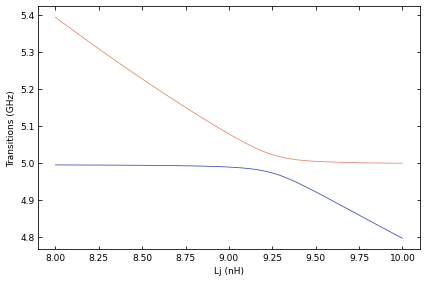

In [7]:
# plotting of the transition frequencies
#fig,ax = plt.subplots(1,1,figsize = (column*0.7,column*0.45))

fig,ax = plt.subplots(1, 1, figsize = (6, 4))
lw = 0.8
plt.plot(L_J*1e9,first_transition/1e9, color = mode_0_color, lw = lw)
plt.plot(L_J*1e9,second_transition/1e9, color = mode_1_color, lw = lw)
plt.xlabel('Lj (nH)')
plt.ylabel('Transitions (GHz)')
plt.tight_layout()
fig.savefig('fig4.pdf',transparent = True)
plt.show()

In [8]:
# Normal mode analysis

# Values of the josephson inductance we will be sweeping
L_J_list = np.linspace(11e-9,9e-9,101)
# Calculate normal mode frequencies, dissipaiton rates, 
# anharmonicity and cross-Kerr
f,k,A,chi = cQED.f_k_A_chi(Lj = L_J_list)

# Alternative method
f = cQED.eigenfrequencies(Lj = L_J_list)
k = cQED.loss_rates(Lj = L_J_list)
A = cQED.anharmonicities(Lj = L_J_list)
chi = cQED.kerr(Lj = L_J_list)

/home/mukhamad-a/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mukhamad-a/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mukhamad-a/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mukhamad-a/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mukhamad-a/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mukhamad-a/.local/lib/python3.9/si

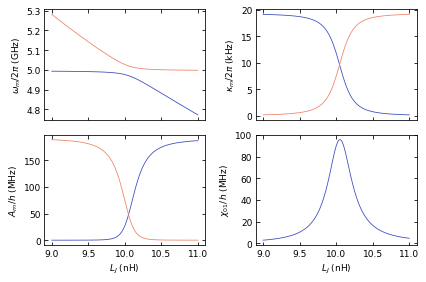

In [9]:
# Plot these results
lw = 0.8

fig,ax = plt.subplots(2,2,sharex = True,figsize = (6,4))
ax[0][0].plot(L_J_list*1e9,f[0]/1e9,label = 'mode #0',color = mode_0_color,lw = lw)
ax[0][0].plot(L_J_list*1e9,f[1]/1e9,label = 'mode #1',color = mode_1_color,lw = lw)
ax[0][0].set_ylabel(r'$\omega_m/2\pi$ (GHz)')

ax[0][1].plot(L_J_list*1e9,k[0]/1e3,color = mode_0_color,lw = lw)
ax[0][1].plot(L_J_list*1e9,k[1]/1e3,color = mode_1_color,lw = lw)
ax[0][1].set_ylabel(r'$\kappa_m/2\pi$ (kHz)')

ax[1][0].plot(L_J_list*1e9,A[0]/1e6,color = mode_0_color,lw = lw)
ax[1][0].plot(L_J_list*1e9,A[1]/1e6,color = mode_1_color,lw = lw)
ax[1][0].set_ylabel('$A_m/h$ (MHz)')

ax[1][1].plot(L_J_list*1e9,chi[0][1]/1e6,color = mode_0_color,lw = lw)
ax[1][1].set_ylabel('$\chi_{01}/h$ (MHz)')

ax[1][0].set_xlabel('$L_J$ (nH)')
ax[1][1].set_xlabel('$L_J$ (nH)')

plt.tight_layout()
fig.savefig('fig2_w_k_A_chi.pdf',transparent = True)
plt.show()

In [10]:
f,k,A,chi = cQED.f_k_A_chi(Lj = 10e-9, pretty_print = True)

         mode |       freq.  |       diss.  |       anha.  |
            0 |     4.98 GHz |     11.8 kHz |     27.2 MHz |
            1 |     5.03 GHz |      7.5 kHz |     74.6 MHz |

Kerr coefficients (diagonal = Kerr, off-diagonal = cross-Kerr)
         mode |         0    |         1    |
            0 |     27.2 MHz |              |
            1 |       90 MHz |     74.6 MHz |



In [11]:
# Sanity check: compare the avoided crossing 
# as calculated from the Hamiltonian and 
# form the eigenfrequencies
rabi_splitting = min(second_transition-first_transition)/1e6
mode_splitting = min(cQED.eigenfrequencies(Lj=np.linspace(9.8e-9,10.2e-9, 101))[1]\
                     -cQED.eigenfrequencies(Lj=np.linspace(9.8e-9,10.2e-9, 101))[0])/1e6

print("Quantum calculation -- Rabi splitting is %.3f MHz"%rabi_splitting)
print("Classical calculation -- normal-mode splitting is %.3f MHz"%mode_splitting)

Quantum calculation -- Rabi splitting is 49.335 MHz
Classical calculation -- normal-mode splitting is 49.343 MHz


/tmp/ipykernel_2219/3975823838.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  print("Classical calculation -- normal-mode splitting is %.3f MHz"%mode_splitting)


In [12]:
# Mode Visualisasi

# Modify the plotting parameters 
# to make the figure more pretty
pp = deepcopy(cQED.plotting_parameters_show)
pp["y_fig_margin"]= 0.7

scale = 1
pp["figsize_scaling"] = scale
pp["C"]["gap"] /= scale
pp["C"]["height"] /= scale
pp["J"]["width"] /= scale
pp["L"]["width"] /= scale
pp["L"]["height"] /= scale
pp["R"]["width"] /= scale
pp["R"]["height"] /= scale
pp["label"]= {
        "fontsize": 10,
        "text_position_horizontal": [0.,-pp["C"]["height"]/2-0.07],
        "text_position_vertical": [pp["C"]["height"]/2+0.05,-0.08]
    }
pp["normal_mode_label"]= {
        "fontsize": 10,
        "color": dark_blue,
        "y_arrow": pp["C"]["height"]/2+0.1,
        "text_position_horizontal": [0.,pp["C"]["height"]/2+0.28],
        "text_position_vertical": [-pp["C"]["height"]/2-0.15,+0.07]
    }
pp["normal_mode_arrow"]= {
        "min_width": 0.1,
        "max_width": 0.4,
        "min_lw": 1,
        "max_lw": 3,
        "min_head": 0.05,
        "max_head": 0.071,
        "color": dark_blue
    }
cQED.plotting_parameters_normal_modes = pp

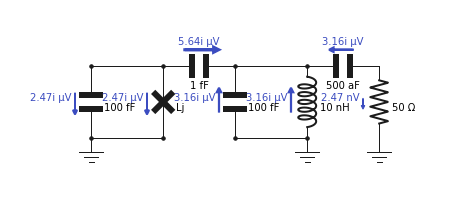

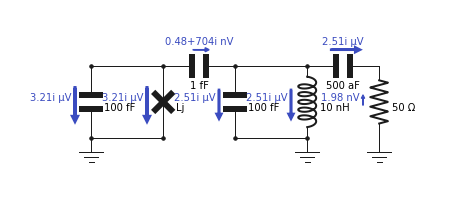

In [13]:
# Visulize the normal modes
fig,ax = cQED.show_normal_mode(mode=0, Lj = 10e-9, quantity = 'voltage',
                               return_fig_ax=True, add_title=False, add_legend=False)
fig.savefig('fig3_mode0_resonance.pdf',transparent = True)

fig,ax = cQED.show_normal_mode(mode=1, Lj = 10e-9, quantity = 'voltage',
                               return_fig_ax=True, add_title=False, add_legend=False)
fig.savefig('fig3_mode1_resonance.pdf',transparent = True,)

In [14]:
rabi_splitting = min(second_transition-first_transition)/1e6
mode_splitting = min(cQED.eigenfrequencies(Lj=np.linspace(9.8e-9,10.2e-9, 101))[1]\
                     -cQED.eigenfrequencies(Lj=np.linspace(9.8e-9,10.2e-9, 101))[0])/1e6

print("Quantum calculation -- Rabi splitting is %.3f MHz"%rabi_splitting)
print("Classical calculation -- normal-mode splitting is %.3f MHz"%mode_splitting)

Quantum calculation -- Rabi splitting is 49.335 MHz
Classical calculation -- normal-mode splitting is 49.343 MHz


/tmp/ipykernel_2219/580746428.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  print("Classical calculation -- normal-mode splitting is %.3f MHz"%mode_splitting)


### Filtered cavity

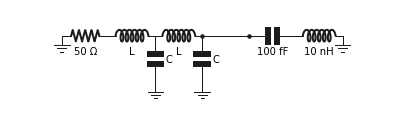

In [15]:
# Build circuit
filtered_cavity = GUI('filtered_cavity.txt',plot = False,edit = False)
# Adapt plotting parameters to make more pretty
filtered_cavity.plotting_parameters_show['figsize_scaling'] = 0.65
# Plot circuit
fig,ax = filtered_cavity.show(plot = False, return_fig_ax = True)
fig.savefig('fig_filtered_cavity.pdf',transparent = True)

In [16]:
f,k,A,chi = filtered_cavity.f_k_A_chi(pretty_print=True, L = 0.3e-6, C = 1e-12)

         mode |       freq.  |       diss.  |       anha.  |
            0 |      173 MHz |     18.8 MHz |          0Hz |
            1 |      464 MHz |     7.76 MHz |          0Hz |
            2 |     5.28 GHz |     68.2 mHz |          0Hz |

Kerr coefficients (diagonal = Kerr, off-diagonal = cross-Kerr)
         mode |         0    |         1    |         2    |
            0 |          0Hz |              |              |
            1 |          0Hz |          0Hz |              |
            2 |          0Hz |          0Hz |          0Hz |



In [17]:
# The resonance modes of the filter
# have a very low quality factors, which make
# them inadequate for quantization
# by default QuCAT will discard these modes
# and notify the user with a warning, here
# we disactivate these warnings
filtered_cavity.warn_discarded_mode = False

# Build a list of inductances and capacitances
points = 31
C_list = np.logspace(-13.5,-11.8,points)
L_list = np.logspace(-8.5,-6.8,points)

# Initialize an array to store the resonator loss rates
k = np.zeros((points,points))

# Sweep over capacitances and inductances
for i,capacitance in enumerate(C_list):
    for j,inductance in enumerate(L_list):
        # Calculate loss rates (for all modes)
        k_all_modes = filtered_cavity.loss_rates(
                    C = capacitance,
                    L = inductance)
        # Store the resonator loss rate
        k[i,j] = k_all_modes[-1]

/home/mukhamad-a/.local/lib/python3.9/site-packages/qucat/core.py:2446: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(hbar/np.real(z)/np.imag(dY(z,**kwargs)))


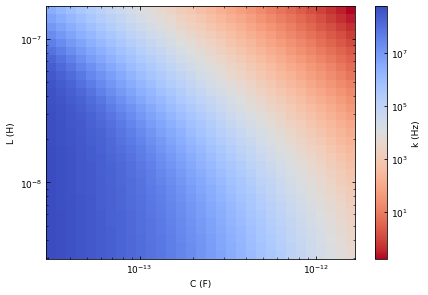

In [18]:
#plt.pcolor(C_list,L_list,k)
#cbar = plt.colorbar()
#fig,ax = plt.subplots(1,1,figsize = (column*1,column*0.7))

fig,ax = plt.subplots(1, 1, figsize = (6, 4))
plt.pcolor(C_list,L_list,k,norm=colors.LogNorm(vmin=k.min(), vmax=k.max()),
               cmap = plt.get_cmap('coolwarm_r'))
cbar = plt.colorbar()
cbar.ax.tick_params(axis='both', which='major', labelsize=9)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()

plt.xlabel("C (F)")
plt.ylabel("L (H)")
cbar.ax.set_ylabel('k (Hz)')
fig.savefig('fig_filtered_cavity_k_vs_LC.png', transparent = True,dpi=300)

## Tunable coupler

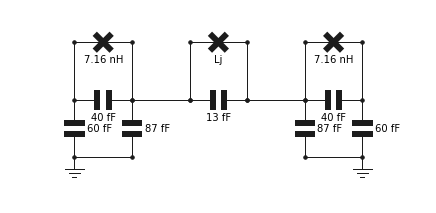

In [19]:
# Build and plot circuit
import scipy.constants as cst
from scipy.constants import pi, hbar, h, e

tuneable_coupler = GUI('tuneable_coupler.txt',plot = False,edit = True)
tuneable_coupler.plotting_parameters_show['figsize_scaling'] = 0.8
fig,ax = tuneable_coupler.show(plot = False, return_fig_ax = True)
fig.savefig('fig_tuneable_coupler_circuit.pdf',transparent = True)

In [20]:
def Lj(phi):
    # maximum Josephson energy
    Ejmax = 6.5e9
    # junction asymmetry
    d = 0.0769
    # flux to Josephson energy
    Ej = Ejmax*np.cos(pi*phi) *np.sqrt(1+d**2 *np.tan(pi*phi)**2)
    # Josephson energy to inductance
    return (hbar/2/e)**2/(Ej*h)

In [21]:
f,k,A,chi = tuneable_coupler.f_k_A_chi(pretty_print=True, Lj=Lj(0))

         mode |       freq.  |       diss.  |       anha.  |
            0 |     3.27 GHz |          0Hz |      165 MHz |
            1 |     6.84 GHz |          0Hz |      128 MHz |
            2 |     6.98 GHz |          0Hz |      117 MHz |

Kerr coefficients (diagonal = Kerr, off-diagonal = cross-Kerr)
         mode |         0    |         1    |         2    |
            0 |      165 MHz |              |              |
            1 |       13 MHz |      128 MHz |              |
            2 |     94.8 MHz |      234 MHz |      117 MHz |



/home/mukhamad-a/.local/lib/python3.9/site-packages/qucat/core.py:2446: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(hbar/np.real(z)/np.imag(dY(z,**kwargs)))


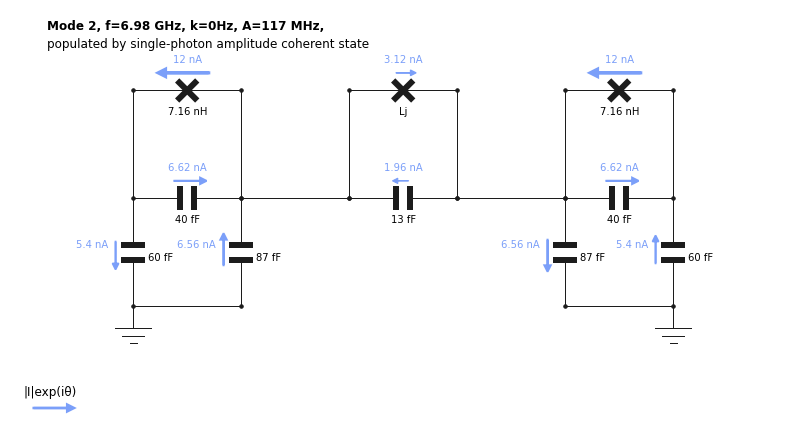

In [22]:
tuneable_coupler.show_normal_mode(mode = 2,
    quantity = 'current',
    Lj=Lj(0))

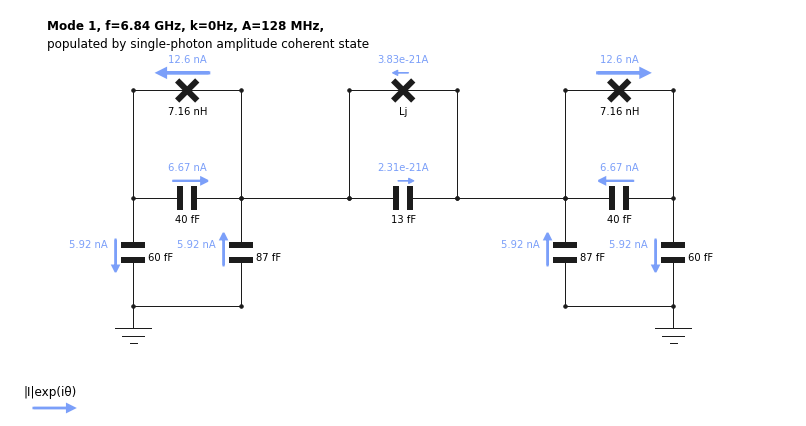

In [23]:
tuneable_coupler.show_normal_mode(mode = 1,
    quantity = 'current',
    Lj=Lj(0))

In [24]:
# Circuit characteristics

Ejmax = 6.5e9 # Maximum Josephson energy of the coupler SQUID
d = 0.0769 # Coupler SQUID assymetry
Ej_t = 22.8e9 # Coupled transmon Josephson energy
Lt = (cst.hbar/2/cst.e)**2/(Ej_t*cst.h) # Coupled transmon inductance

# Function to transform Josephson energy into
# Josephson inductance
def Lc(phi):
    Ej = Ejmax*np.cos(cst.pi*phi)*np.sqrt(1+d**2*np.tan(cst.pi*phi)**2)
    return (cst.hbar/2/cst.e)**2/(Ej*cst.h)

In [25]:
# modes to include when generating the system Hamiltonian
modes_to_include = [1,2]

# Values of the bias flux to sweep
phi_list = np.linspace(-0.25,0.5,201)

# Iitialize a list of transition frequencies
fs = [np.zeros(len(phi_list)) for mode in modes_to_include]

for i,phi in enumerate(phi_list):
    # Generate the Hamiltonian
    H = tuneable_coupler.hamiltonian(
        Lj = Lc(phi), 
        excitations = 7, 
        taylor = 4, 
        modes = modes_to_include)
    
    # compute eigenenergies and eigenstates
    ee,es = H.eigenstates()
    
    # Add the first two transition frequencies of the 
    # two modes considered to the list of transition frequencies
    for m,mode in enumerate(modes_to_include):
        fs[m][i] = ee[m+1]-ee[0]

/home/mukhamad-a/.local/lib/python3.9/site-packages/qucat/core.py:2446: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(hbar/np.real(z)/np.imag(dY(z,**kwargs)))


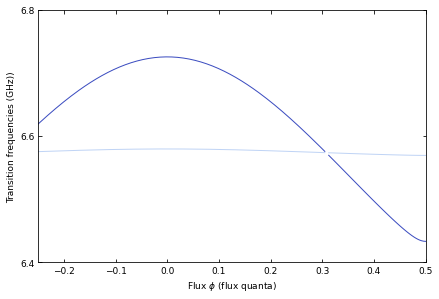

In [26]:
# Plot the eigenfrequencies

#fig,ax = plt.subplots(1,1,figsize = (column*0.55,column*0.45))
fig,ax = plt.subplots(1, 1, figsize = (6, 4))
# Since the two curves cross, we define 
# an index cutoff_i at which the curves should switch colors
cutoff_i = np.argmin(np.absolute(fs[0]-fs[1]))
lw = 1
mode_1 = 1
mode_2 = 0
ax.plot(phi_list[:cutoff_i],fs[mode_1][:cutoff_i]/1e9,color = dark_blue, lw = lw)
ax.plot(phi_list[cutoff_i+1:],fs[mode_1][cutoff_i+1:]/1e9,color = light_blue, lw = lw)
ax.plot(phi_list[:cutoff_i],fs[mode_2][:cutoff_i]/1e9,color = light_blue, lw = lw)
ax.plot(phi_list[cutoff_i+1:],fs[mode_2][cutoff_i+1:]/1e9,color = dark_blue, lw = lw)
ax.set_yticks([6.4,6.6,6.8])
ax.set_xlim(-0.25,0.5)
ax.set_ylim(6.4,6.8)
plt.tight_layout()
plt.xlabel('Flux $\phi$ (flux quanta)')
plt.ylabel('Transition frequencies (GHz))')
fig.savefig('fig_freq_vs_flux.pdf',transparent = True)

/home/mukhamad-a/.local/lib/python3.9/site-packages/qucat/core.py:2446: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(hbar/np.real(z)/np.imag(dY(z,**kwargs)))


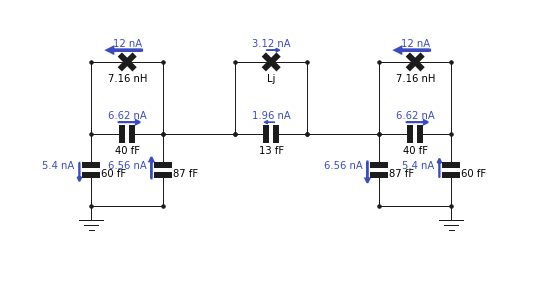

/tmp/ipykernel_2219/3024139927.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [27]:
# Visualize the symmetric normal mode
tuneable_coupler.plotting_parameters_normal_modes['figsize_scaling'] = 1
tuneable_coupler.plotting_parameters_normal_modes["normal_mode_arrow"][ "color"]= dark_blue
tuneable_coupler.plotting_parameters_normal_modes["normal_mode_label"][ "color"]= dark_blue
fig,ax = tuneable_coupler.show_normal_mode(2,quantity = 'current',Lj = Lc(0),
        return_fig_ax=True,add_legend=False,add_title=False)
fig.savefig("tuneable_coupler_mode_2.pdf",transparent =True)
fig.show()

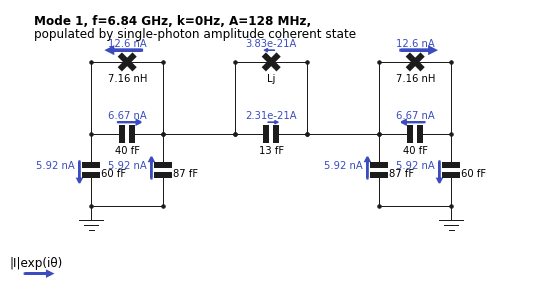

In [28]:
# Visualize the antisymmetric normal mode
tuneable_coupler.show_normal_mode(1,quantity = 'current',Lj = Lc(0))

## Algorithmic Method

### Example circuit

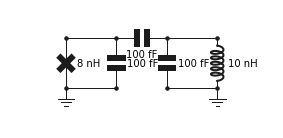

In [29]:
f_finder = GUI('f_finder_example_circuit.txt',plot = False, edit = True)
f_finder.plotting_parameters_show['figsize_scaling'] = 0.7
fig,ax = f_finder.show(plot = False, return_fig_ax = True)
fig.savefig('fig_f_finder_example_circuit.pdf',transparent = True)

### Differentiating admittance

/tmp/ipykernel_2219/2422360324.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "clip_on" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig("fig_dY_from_differentiation.pdf",transparent = True,clip_on=False)


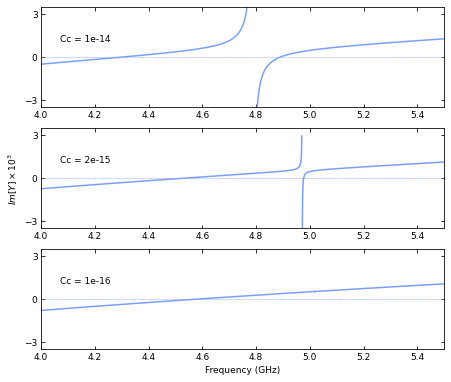

In [30]:
# Analytical expression for the circuit admittance of 
# a coupled transmon/resonator
def Y(w):
    return 1j*C1*w+1/L1/1j/w+1/(1/Cc/1j/w+1/(C2*1j*w+1/L2/1j/w+1/(1/Cc2/1j/w+R)))

# System parameters
C1,C2 = 1e-13,1e-13
L1,L2 = 12e-9,1e-8
Cc = 1e-15
Cc2 = 0.5e-15
R = 50

# Frequencies to sweep
f = np.linspace(4e9,5.5e9,5001)

# Plot admittance for different coupling capacitors
#fig,ax = plt.subplots(3,1,sharex = True,figsize = (column*0.65,column*0.6))
fig,ax = plt.subplots(3, 1, figsize = (8, 7))
plt.subplots_adjust(left = 0.2, bottom = 0.2)
fig.set
ymax = 3.5
for i,Cc in enumerate([10e-15,2e-15,1e-16]):
    to_plot = Y(2*np.pi*f)
    stop = np.argmax(to_plot[1:]-to_plot[:-1])
    ax[i].plot(f[:stop-2]/1e9,np.imag(Y(2*np.pi*f[:stop-2]))*1e3, color = blue)
    ax[i].plot(f[stop+2:]/1e9,np.imag(Y(2*np.pi*f[stop+2:]))*1e3, color = blue)
    ax[i].axhline(0, ls='--', lw = 0.5, color = blue)
    ax[i].set_xlim(4,5.5)
    ax[i].set_ylim(-ymax,ymax)
    ax[i].set_yticks([-3,0,3])
    ax[i].text(4.07,1.1,'Cc = %.0e'%Cc)
ax[1].set_ylabel(r"$Im[Y]\times10^3$")
ax[-1].set_xlabel("Frequency (GHz)")
fig.savefig("fig_dY_from_differentiation.pdf",transparent = True,clip_on=False)

### Choice of reference element

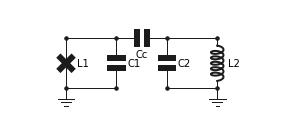

J 0 2 L1
C 0 2 C1
C 0 1 Cc
C 1 2 C2
L 1 2 L2




In [31]:
# Build and plot example circuit
c = GUI('best_ref_elt.txt', edit = True, plot = True, print_network=True)

In [32]:
print(c.components['C1'].node_minus)
print(c.components['C1'].node_plus)
print(c.components['C2'].node_minus)
print(c.components['C2'].node_plus)

2
0
2
1


In [33]:
# Construct list of zero-point fluctuations in flux
# as a function of coupling capacitance
C_list = np.logspace(-14.5,-21,301) # Coupling capacitance
to_plot = []
transfer_functions = []
for i,Cc in enumerate(C_list):
    kwargs = {'Cc':Cc,'C1':100e-15,'L2':8e-9,'C2':100e-15,'L1':10e-9}
    f,_,A,_ = c.f_k_A_chi(pretty_print=False,**kwargs)
    to_plot.append([c.components['L1']._flux_zpf_r(c.zeta[1],**kwargs),
        c.components['L2']._flux_zpf_r(c.zeta[1],**kwargs)])
    transfer_functions.append(c._flux_transformation_dict[1, 0, 1, 2](f[1]*np.pi*2,**kwargs))

Ej = c.components['L2']._get_Ej(**kwargs)
phi_0 = hbar/2./e
to_plot = np.array(to_plot)/phi_0
transfer_functions = np.array(transfer_functions)

KeyError: (1, 0, 1, 2)

In [ ]:
# Plot phi_zpf_r
fig,ax = plt.subplots(2,1,figsize = (column*0.7,column*0.45), sharex = True)
fig.subplots_adjust(hspace=0.4)
lw = 1
ax[0].loglog(C_list/1e-15,to_plot[:,0], color = red, lw = lw)
ax[0].loglog(C_list/1e-15,to_plot[:,1], color = blue, lw = lw)
A_L = np.absolute(to_plot[:,0]*transfer_functions)**4*Ej/2/1e6
A_J = np.absolute(to_plot[:,1])**4*Ej/2/1e6
ax[1].semilogx(C_list/1e-15,A_L, color = red, lw = lw)
ax[1].semilogx(C_list/1e-15,A_J,'--', color = blue, lw = lw)
ax[1].set_ylim(0,250)
ax[0].set_ylim([1e-9,1])
ax[0].set_yticks([1e-8,1e-4,1])
ax[1].set_yticks([0,100,200])
# plt.tight_layout()
fig.savefig('fig_best_ref_elt.pdf',transparent = True)
plt.show()